In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [86]:
df = pd.read_excel('Rworkdd.xlsx')
df.head()

,ID,OCCUPATION,AGE,GENDER,FAMILY_HISTORY,DIAGNOSIS,DRUG_HISTORY,DIETARY_INFORMATION,GENETIC_INFORMATION,ALLERGY_HISTORY,SERVICE_RENDERING,HOSPITALIZATION,PHARMACOLOGICAL_GROUP,NUMER_OF_REACTION_EPISODES,LATENCY_PERIOD
0,2,POLICE,34,MALE,YES,DIABETES,YES,NO,NO,YES,SPECIALIST,YES,NSAID,1-5,LATE
1,4,CIVIL SERVANT,43,MALE,YES,FEVER,NO,NO,YES,YES,SPECIALIST,YES,NSAID,5-10,LATE
2,6,TRADER,23,FEMALE,YES,MALARIA,NO,YES,NO,YES,SPECIALIST,YES,BETA-LAM ANTIBIOTICS,5-10,LATE
3,8,TEACHER,34,MALE,NO,SEVER FEVER,NO,NO,YES,YES,SPECIALIST,YES,MACROLIDES,5-10,LATE
4,10,TRADER,56,MALE,YES,HYPERTENSION,YES,YES,NO,YES,SPECIALIST,YES,MACROLIDES,1-5,IMMEDIATE


In [87]:
df.isna().sum()

ID                            0
OCCUPATION                    0
AGE                           0
GENDER                        0
FAMILY_HISTORY                0
DIAGNOSIS                     0
DRUG_HISTORY                  0
DIETARY_INFORMATION           0
GENETIC_INFORMATION           0
ALLERGY_HISTORY               0
SERVICE_RENDERING             0
HOSPITALIZATION               0
PHARMACOLOGICAL_GROUP         0
NUMER_OF_REACTION_EPISODES    0
LATENCY_PERIOD                0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          311 non-null    int64 
 1   OCCUPATION                  311 non-null    object
 2   AGE                         311 non-null    object
 3   GENDER                      311 non-null    object
 4   FAMILY_HISTORY              311 non-null    object
 5   DIAGNOSIS                   311 non-null    object
 6   DRUG_HISTORY                311 non-null    object
 7   DIETARY_INFORMATION         311 non-null    object
 8   GENETIC_INFORMATION         311 non-null    object
 9   ALLERGY_HISTORY             311 non-null    object
 10  SERVICE_RENDERING           311 non-null    object
 11  HOSPITALIZATION             311 non-null    object
 12  PHARMACOLOGICAL_GROUP       311 non-null    object
 13  NUMER_OF_REACTION_EPISODES  311 non-null    object

In [89]:
df.describe()

,ID
count,311.000000
mean,311.996785
std,179.838826
min,2.000000
25%,157.000000
50%,312.000000
75%,467.000000
max,621.000000


In [90]:
X = pd.get_dummies(df.drop('ALLERGY_HISTORY', axis=1),drop_first=True)
y = df['ALLERGY_HISTORY']

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [93]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [94]:
#help(RandomForestClassifier)

In [95]:
Rmodel = RandomForestClassifier(n_estimators=20,random_state=101,max_features='auto')

In [96]:
Rmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=20, random_state=101)

In [97]:
Rpreds = Rmodel.predict(X_test)

In [98]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,mean_absolute_error,mean_squared_error

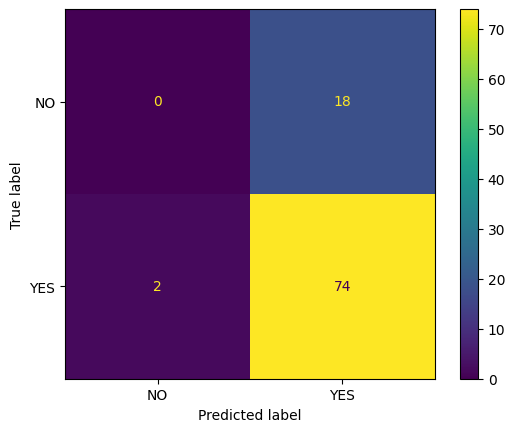

In [99]:
cm = confusion_matrix(y_test,Rpreds)
dip=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rmodel.classes_)
dip.plot()

In [100]:
#help(ConfusionMatrixDisplay)

In [101]:
confusion_matrix(y_test,Rpreds)

array([[ 0, 18],
       [ 2, 74]])

In [102]:
Rmodel.feature_importances_

array([1.55133137e-01, 2.60455210e-03, 0.00000000e+00, 3.74093078e-02,
       1.74354597e-02, 4.65233369e-03, 2.32393210e-02, 1.30498368e-02,
       1.18703308e-02, 0.00000000e+00, 2.79406424e-04, 2.17491305e-03,
       2.06824606e-02, 2.28224517e-03, 4.17559997e-02, 5.67030592e-03,
       2.94056045e-03, 3.68239195e-03, 5.96414972e-04, 1.61029070e-02,
       0.00000000e+00, 0.00000000e+00, 2.39453017e-03, 0.00000000e+00,
       1.40709198e-03, 5.71492581e-03, 2.67197604e-03, 0.00000000e+00,
       1.16790648e-04, 1.47499834e-02, 1.29765300e-03, 9.44308410e-03,
       0.00000000e+00, 1.76687452e-02, 9.07129962e-03, 9.75710139e-03,
       1.25350625e-02, 2.10761461e-04, 2.56148548e-02, 3.52283025e-04,
       3.46600399e-02, 2.77521997e-04, 3.30197410e-03, 0.00000000e+00,
       1.37506121e-02, 3.91795761e-04, 1.26973191e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.62679808e-06, 0.00000000e+00,
       8.15448396e-03, 8.97828213e-03, 1.46896618e-03, 0.00000000e+00,
      

In [103]:
print(classification_report(y_test,Rpreds))

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00        18
         YES       0.80      0.97      0.88        76

    accuracy                           0.79        94
   macro avg       0.40      0.49      0.44        94
weighted avg       0.65      0.79      0.71        94



<Axes: xlabel='ALLERGY_HISTORY', ylabel='count'>

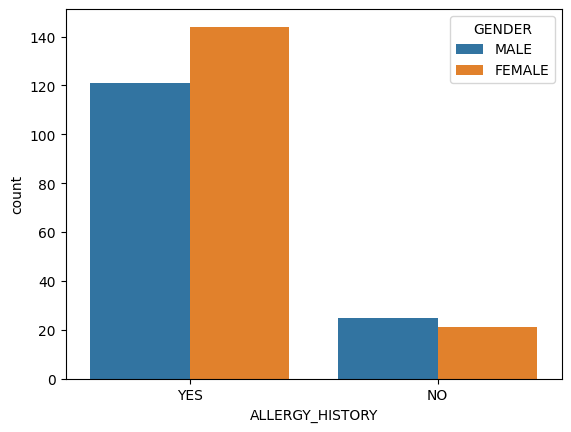

In [104]:
sns.countplot(df,x='ALLERGY_HISTORY',hue='GENDER')

In [105]:
n_estimators=[64,100,128,200]
max_features= [8,13,20,28]
bootstrap = [True,False]
oob_score = [True,False]

In [106]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [107]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [108]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [8, 13, 20, 28],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [109]:
grid.best_params_

{'bootstrap': True,
 'max_features': 28,
 'n_estimators': 100,
 'oob_score': False}

In [110]:
predicitions = grid.predict(X_test)

In [111]:
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

          NO       0.33      0.06      0.10        18
         YES       0.81      0.97      0.89        76

    accuracy                           0.80        94
   macro avg       0.57      0.51      0.49        94
weighted avg       0.72      0.80      0.73        94



In [112]:
confusion_matrix(
    y_test,predicitions)

array([[ 1, 17],
       [ 2, 74]])

# **ADA BOOST SECTION**

In [113]:
Adamodel = AdaBoostClassifier()

In [114]:
Adamodel.fit(X_train, y_train)

AdaBoostClassifier()

In [115]:
pdt = Adamodel.predict(X_test)

In [116]:
print(classification_report(y_test,pdt))

              precision    recall  f1-score   support

          NO       0.44      0.44      0.44        18
         YES       0.87      0.87      0.87        76

    accuracy                           0.79        94
   macro avg       0.66      0.66      0.66        94
weighted avg       0.79      0.79      0.79        94



In [117]:
confusion_matrix(y_test,pdt)

array([[ 8, 10],
       [10, 66]])

In [118]:
error_rates = []

for n in range(1,96):

    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)

    error_rates.append(err)

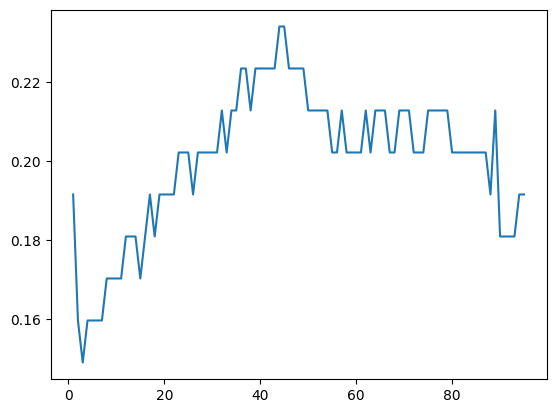

In [119]:
plt.plot(range(1,96),error_rates)

In [120]:
model

AdaBoostClassifier(n_estimators=95)

In [121]:
model.feature_importances_

array([0.45263158, 0.01052632, 0.01052632, 0.01052632, 0.        ,
       0.01052632, 0.        , 0.01052632, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.02105263,
       0.        , 0.        , 0.        , 0.        , 0.01052632,
       0.01052632, 0.        , 0.01052632, 0.01052632, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.01052632, 0.01052632,
       0.        , 0.        , 0.        , 0.01052632, 0.01052632,
       0.04210526, 0.        , 0.01052632, 0.        , 0.01052632,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.03157895, 0.        , 0.        , 0.02105263,
       0.        , 0.        , 0.04210526, 0.        , 0.01052

In [122]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [123]:
imp_feats = feats[feats['Importance']>0.03]
imp_feats

,Importance
ID,0.452632
AGE_54,0.042105
FAMILY_HISTORY_YES,0.031579
DIAGNOSIS_DIABETES,0.031579
DIAGNOSIS_SEVER FEVER,0.042105
PHARMACOLOGICAL_GROUP_MACROLIDES,0.031579
LATENCY_PERIOD_UNKOWN,0.042105


In [124]:
X.columns

Index(['ID', 'OCCUPATION_8', 'OCCUPATION_9', 'OCCUPATION_CIVIL SERVANT',
       'OCCUPATION_OTHERS', 'OCCUPATION_POLICE', 'OCCUPATION_STUDENT',
       'OCCUPATION_TEACHER', 'OCCUPATION_TRADER', 'AGE_20', 'AGE_21', 'AGE_22',
       'AGE_23', 'AGE_24', 'AGE_25', 'AGE_26', 'AGE_27', 'AGE_28', 'AGE_29',
       'AGE_31', 'AGE_32', 'AGE_33', 'AGE_34', 'AGE_35', 'AGE_36', 'AGE_37',
       'AGE_38', 'AGE_39', 'AGE_40', 'AGE_41', 'AGE_42', 'AGE_43', 'AGE_44',
       'AGE_45', 'AGE_46', 'AGE_47', 'AGE_48', 'AGE_51', 'AGE_52', 'AGE_53',
       'AGE_54', 'AGE_55', 'AGE_56', 'AGE_58', 'AGE_59', 'AGE_60', 'AGE_61',
       'AGE_62', 'AGE_63', 'AGE_64', 'AGE_65', 'AGE_66', 'AGE_67', 'AGE_68',
       'AGE_69', 'AGE_70', 'AGE_71', 'AGE_72', 'AGE_74', 'AGE_75', 'AGE_76',
       'AGE_78', 'AGE_80', 'AGE_BARBER', 'GENDER_MALE', 'FAMILY_HISTORY_YES',
       'DIAGNOSIS_DIABETES', 'DIAGNOSIS_DIABETES&HYPERTENSION',
       'DIAGNOSIS_FEVER', 'DIAGNOSIS_HYPERTENSION', 'DIAGNOSIS_KIDNEY PROBLEM',
       'DIAGNOS

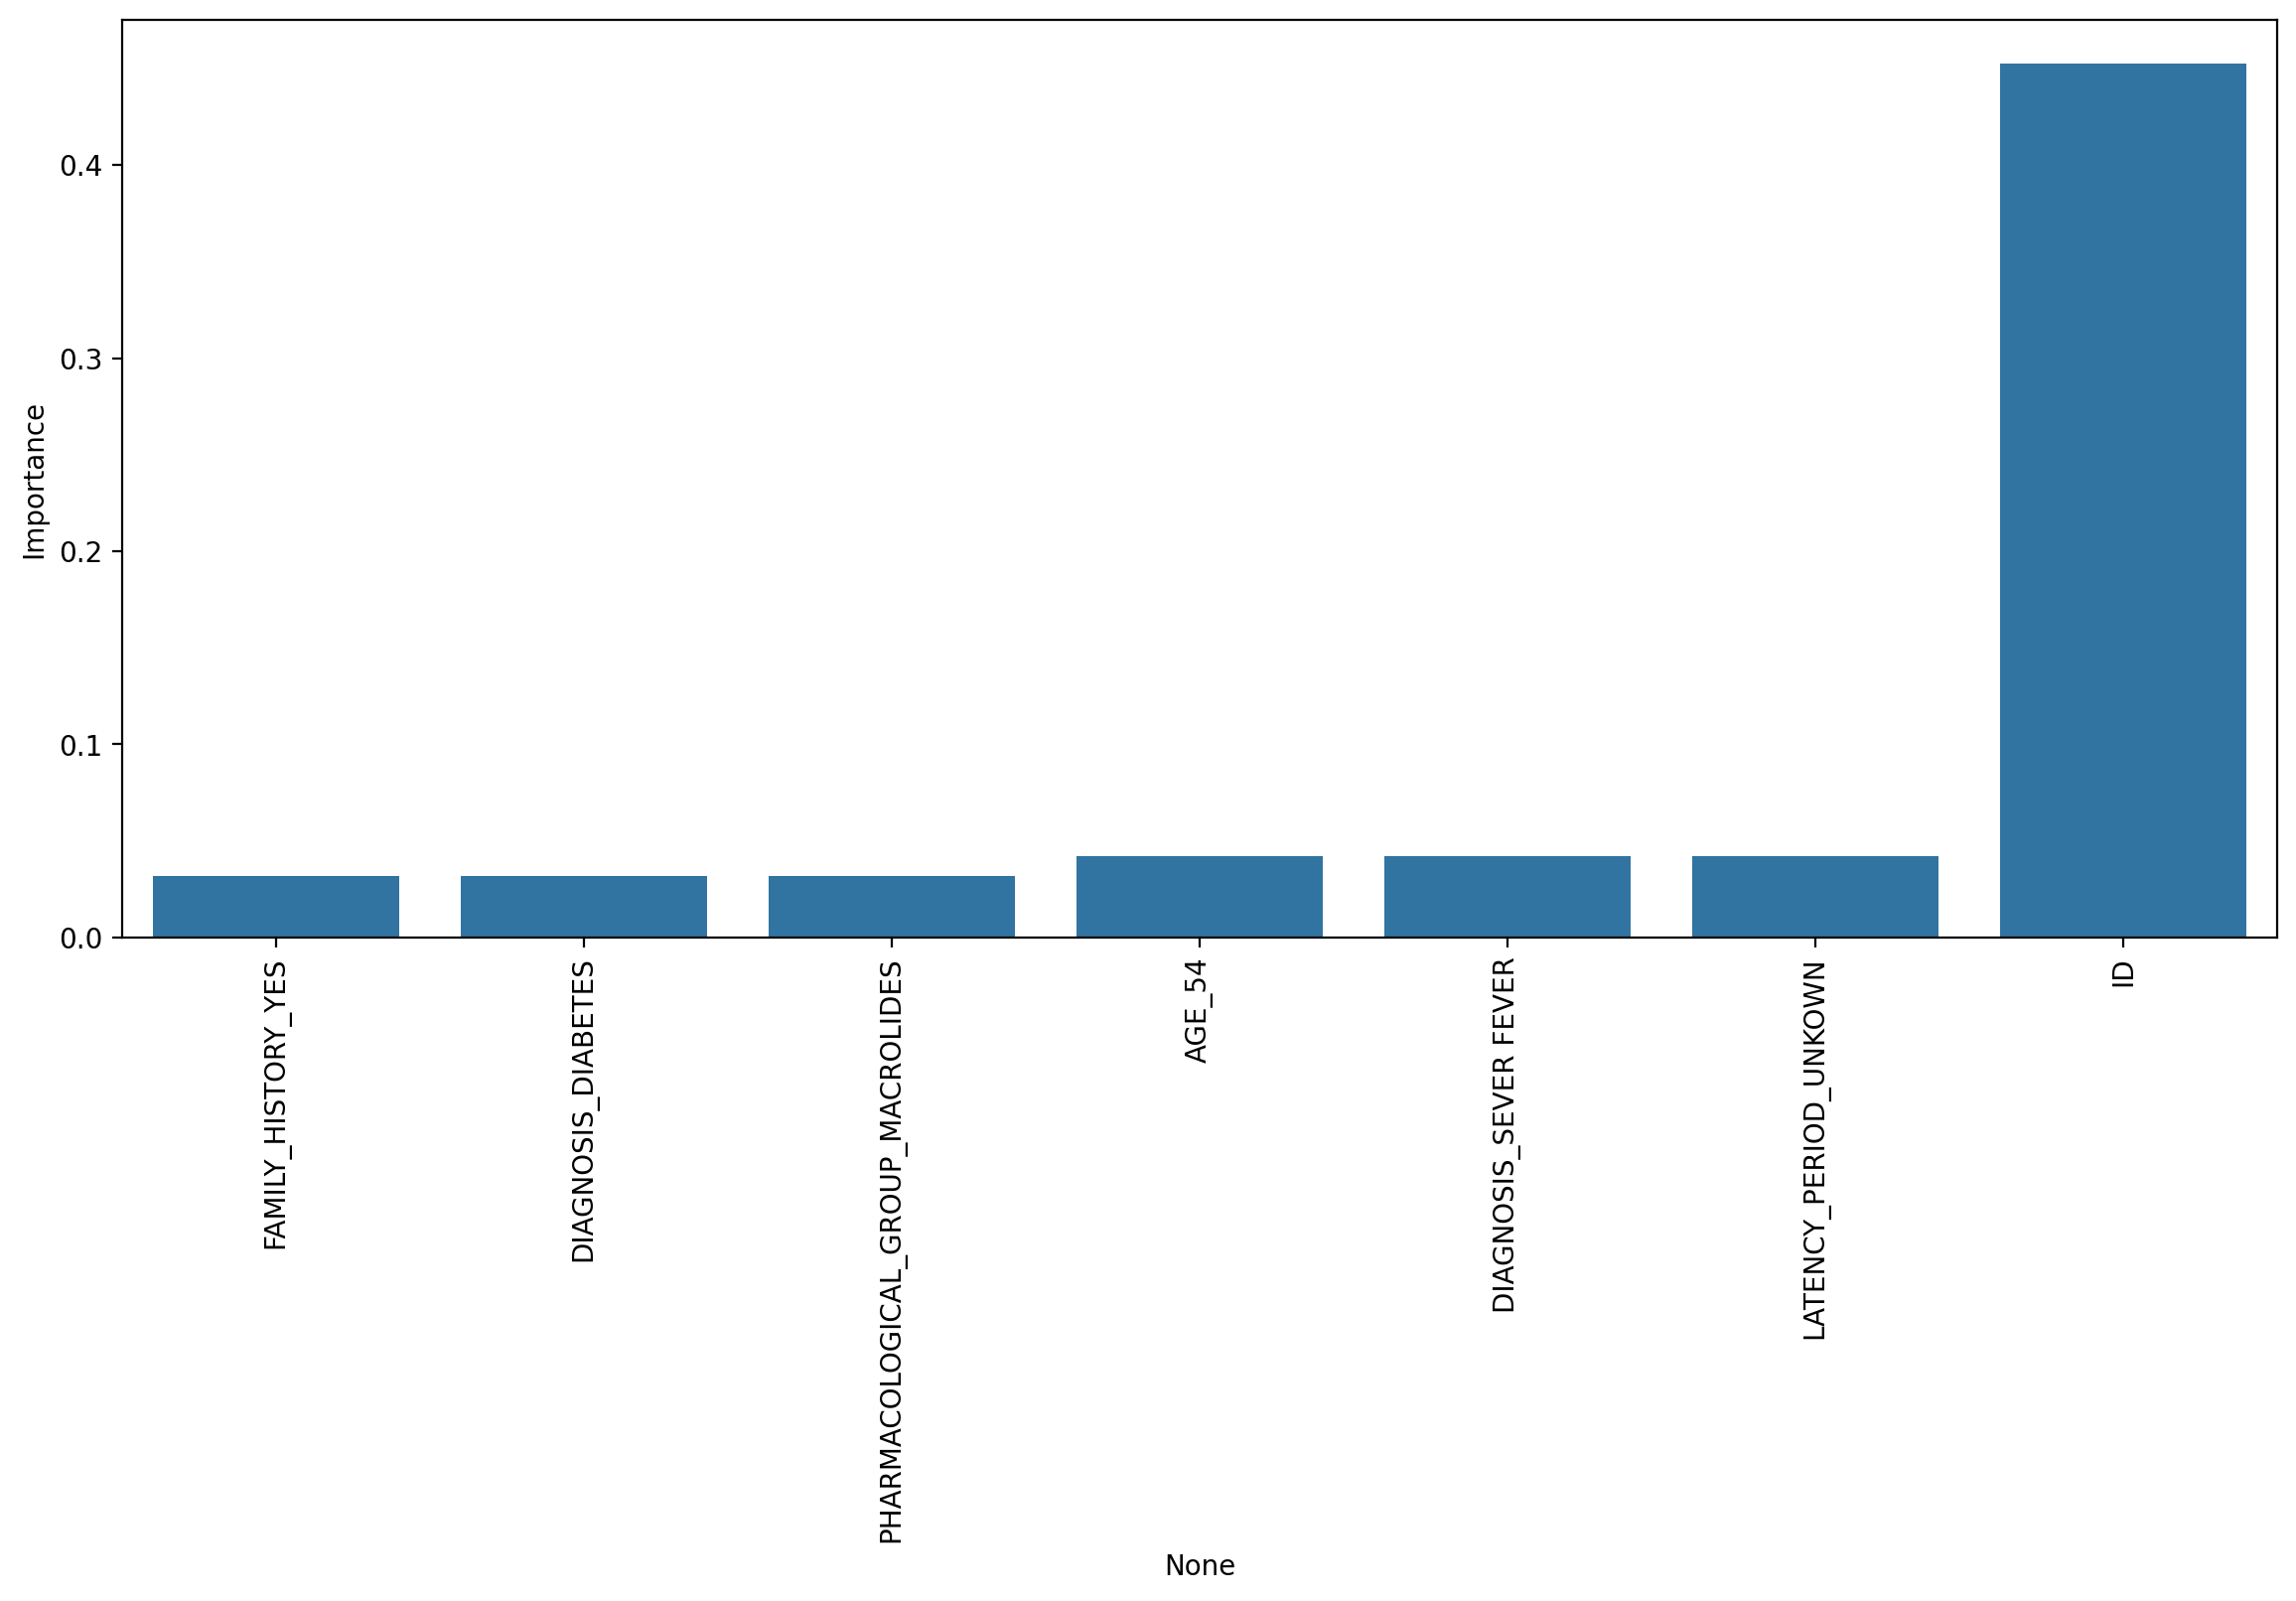

In [125]:
imp_feats = imp_feats.sort_values("Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [126]:
gang = [('random _Forrest',Rmodel),('AdaBoost',Adamodel)]
combined_model = VotingClassifier(estimators=gang, voting='soft')
combined_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('random _Forrest',
                              RandomForestClassifier(max_features='auto',
                                                     n_estimators=20,
                                                     random_state=101)),
                             ('AdaBoost', AdaBoostClassifier())],
                 voting='soft')

In [127]:
predC= combined_model.predict(X_test)
accuracy_score(y_test,predC)

0.7872340425531915

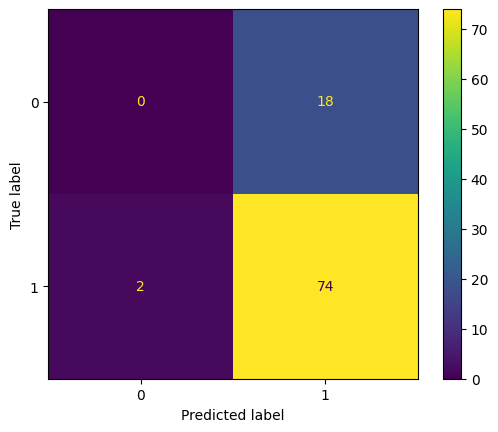

In [128]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predC)).plot()

In [129]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [131]:
df.head()

,ID,OCCUPATION,AGE,GENDER,FAMILY_HISTORY,DIAGNOSIS,DRUG_HISTORY,DIETARY_INFORMATION,GENETIC_INFORMATION,ALLERGY_HISTORY,SERVICE_RENDERING,HOSPITALIZATION,PHARMACOLOGICAL_GROUP,NUMER_OF_REACTION_EPISODES,LATENCY_PERIOD
0,2,POLICE,34,MALE,YES,DIABETES,YES,NO,NO,YES,SPECIALIST,YES,NSAID,1-5,LATE
1,4,CIVIL SERVANT,43,MALE,YES,FEVER,NO,NO,YES,YES,SPECIALIST,YES,NSAID,5-10,LATE
2,6,TRADER,23,FEMALE,YES,MALARIA,NO,YES,NO,YES,SPECIALIST,YES,BETA-LAM ANTIBIOTICS,5-10,LATE
3,8,TEACHER,34,MALE,NO,SEVER FEVER,NO,NO,YES,YES,SPECIALIST,YES,MACROLIDES,5-10,LATE
4,10,TRADER,56,MALE,YES,HYPERTENSION,YES,YES,NO,YES,SPECIALIST,YES,MACROLIDES,1-5,IMMEDIATE


In [132]:
#help(LabelEncoder)

In [133]:
dfcopy=df.copy()

In [134]:
dfcopy['ALLERGY_HISTORY']= LabelEncoder().fit_transform(dfcopy['ALLERGY_HISTORY'])

In [135]:
XX_train, XX_test,yy_train,yy_test= train_test_split(X,dfcopy['ALLERGY_HISTORY'],test_size=0.3, random_state=101)

In [136]:
clf=MultinomialNB()

In [137]:
clf.fit(XX_train,yy_train)

MultinomialNB()

In [138]:
predNB = clf.predict(XX_test)

In [139]:
print(classification_report(yy_test,predNB))

              precision    recall  f1-score   support

           0       0.14      0.06      0.08        18
           1       0.80      0.92      0.86        76

    accuracy                           0.76        94
   macro avg       0.47      0.49      0.47        94
weighted avg       0.68      0.76      0.71        94



In [140]:
ang = [('random _Forrest',Rmodel),('AdaBoost',Adamodel),('Naive Bayes', clf)]
bad = VotingClassifier(estimators=ang, voting='soft')
bad.fit(X_train,yy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('random _Forrest',
                              RandomForestClassifier(max_features='auto',
                                                     n_estimators=20,
                                                     random_state=101)),
                             ('AdaBoost', AdaBoostClassifier()),
                             ('Naive Bayes', MultinomialNB())],
                 voting='soft')

In [141]:
#predBad= bad.predict(X_test)
#accuracy_score(y_test,predBad)

**Combineing the 3 from start**

In [142]:
df.head()

,ID,OCCUPATION,AGE,GENDER,FAMILY_HISTORY,DIAGNOSIS,DRUG_HISTORY,DIETARY_INFORMATION,GENETIC_INFORMATION,ALLERGY_HISTORY,SERVICE_RENDERING,HOSPITALIZATION,PHARMACOLOGICAL_GROUP,NUMER_OF_REACTION_EPISODES,LATENCY_PERIOD
0,2,POLICE,34,MALE,YES,DIABETES,YES,NO,NO,YES,SPECIALIST,YES,NSAID,1-5,LATE
1,4,CIVIL SERVANT,43,MALE,YES,FEVER,NO,NO,YES,YES,SPECIALIST,YES,NSAID,5-10,LATE
2,6,TRADER,23,FEMALE,YES,MALARIA,NO,YES,NO,YES,SPECIALIST,YES,BETA-LAM ANTIBIOTICS,5-10,LATE
3,8,TEACHER,34,MALE,NO,SEVER FEVER,NO,NO,YES,YES,SPECIALIST,YES,MACROLIDES,5-10,LATE
4,10,TRADER,56,MALE,YES,HYPERTENSION,YES,YES,NO,YES,SPECIALIST,YES,MACROLIDES,1-5,IMMEDIATE


In [143]:
df= df.drop('ID',axis=1)
df.head()

,OCCUPATION,AGE,GENDER,FAMILY_HISTORY,DIAGNOSIS,DRUG_HISTORY,DIETARY_INFORMATION,GENETIC_INFORMATION,ALLERGY_HISTORY,SERVICE_RENDERING,HOSPITALIZATION,PHARMACOLOGICAL_GROUP,NUMER_OF_REACTION_EPISODES,LATENCY_PERIOD
0,POLICE,34,MALE,YES,DIABETES,YES,NO,NO,YES,SPECIALIST,YES,NSAID,1-5,LATE
1,CIVIL SERVANT,43,MALE,YES,FEVER,NO,NO,YES,YES,SPECIALIST,YES,NSAID,5-10,LATE
2,TRADER,23,FEMALE,YES,MALARIA,NO,YES,NO,YES,SPECIALIST,YES,BETA-LAM ANTIBIOTICS,5-10,LATE
3,TEACHER,34,MALE,NO,SEVER FEVER,NO,NO,YES,YES,SPECIALIST,YES,MACROLIDES,5-10,LATE
4,TRADER,56,MALE,YES,HYPERTENSION,YES,YES,NO,YES,SPECIALIST,YES,MACROLIDES,1-5,IMMEDIATE


In [144]:
df['ALLERGY_HISTORY']=LabelEncoder().fit_transform(df['ALLERGY_HISTORY'])
#df['AGE']=pd.to_numeric(df['AGE'],errors='coerce').astype(int)

df = df.drop(df[df['AGE']=='BARBER'].index)

In [145]:
df['AGE']=pd.to_numeric(df['AGE'],errors='coerce').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   OCCUPATION                  310 non-null    object
 1   AGE                         310 non-null    int64 
 2   GENDER                      310 non-null    object
 3   FAMILY_HISTORY              310 non-null    object
 4   DIAGNOSIS                   310 non-null    object
 5   DRUG_HISTORY                310 non-null    object
 6   DIETARY_INFORMATION         310 non-null    object
 7   GENETIC_INFORMATION         310 non-null    object
 8   ALLERGY_HISTORY             310 non-null    int64 
 9   SERVICE_RENDERING           310 non-null    object
 10  HOSPITALIZATION             310 non-null    object
 11  PHARMACOLOGICAL_GROUP       310 non-null    object
 12  NUMER_OF_REACTION_EPISODES  310 non-null    object
 13  LATENCY_PERIOD              310 non-null    object
dtyp

In [146]:
X=pd.get_dummies(df.drop('ALLERGY_HISTORY', axis=1),drop_first=True)
y = df['ALLERGY_HISTORY']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_holdouttest, y_validation, y_holdouttest = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [148]:
len(X_validation)

46

In [149]:
model1 = MultinomialNB()
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = AdaBoostClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [150]:
predictions1 = model1.predict(X_validation)
predictions2 = model2.predict(X_validation)
predictions3 = model3.predict(X_validation)

In [151]:
ng = [('random _Forrest',model2),('AdaBoost',model3),('Naive Bayes', model1)]
badder = VotingClassifier(estimators=ng, voting='soft')
badder.fit(X_train,y_train)

VotingClassifier(estimators=[('random _Forrest',
                              RandomForestClassifier(random_state=42)),
                             ('AdaBoost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('Naive Bayes', MultinomialNB())],
                 voting='soft')

In [152]:
predbadder = badder.predict(X_test)
print(classification_report(y_test,predbadder))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.89      0.99      0.94        83

    accuracy                           0.88        93
   macro avg       0.45      0.49      0.47        93
weighted avg       0.80      0.88      0.84        93



In [153]:

newdataPred = badder.predict(X_holdouttest)
print(classification_report(y_holdouttest,newdataPred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.89      0.98      0.93        42

    accuracy                           0.87        47
   macro avg       0.45      0.49      0.47        47
weighted avg       0.80      0.87      0.83        47



In [154]:
confusion_matrix(y_holdouttest,newdataPred)

array([[ 0,  5],
       [ 1, 41]])

In [157]:
mean_absolute_error(y_holdouttest,newdataPred)

0.1276595744680851

In [159]:
mean_absolute_error(y_test, predbadder)

0.11827956989247312

In [156]:
confusion_matrix(y_test,predbadder)

array([[ 0, 10],
       [ 1, 82]])

In [160]:
# prompt: how to save my ipynb file to my github repository

from google.colab import drive
drive.mount('/content/drive')

# Save the notebook to your Google Drive
!cp /content/Rworkdd.ipynb /content/drive/MyDrive/Rworkdd.ipynb

# Clone your GitHub repository
!git clone https://github.com/[your-username]/[your-repository].git

# Copy the notebook from your Google Drive to your local machine
!cp /content/drive/MyDrive/Rworkdd.ipynb /content/[your-repository]/

# Add the notebook to your GitHub repository
!git add /content/[your-repository]/Rworkdd.ipynb

# Commit the changes to your GitHub repository
!git commit -m "Added Rworkdd.ipynb"

# Push the changes to your GitHub repository
!git push origin master


Cloning into 'aremu'...
/content/aremu
fatal: pathspec 'Aremu.ipynb' did not match any files
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/kufopi/aremu.git'
